### Task 2

Unscaled θ* (analytical): [2.21509616 2.99954023]
Unscaled GD final θ:      [0.24181875 3.00254587]
Learning rate (unscaled): 1e-06
Converged in: NOT converged (200k iters limit) iterations

Scaled θ* (analytical):   [1412.54114977  887.85858784]
Scaled GD final θ:        [1412.54030453  887.85805656]
Learning rate (scaled):   0.05
Converged in: 136 iterations

Feature mean (μx): 470.1807, std (σx): 295.9982


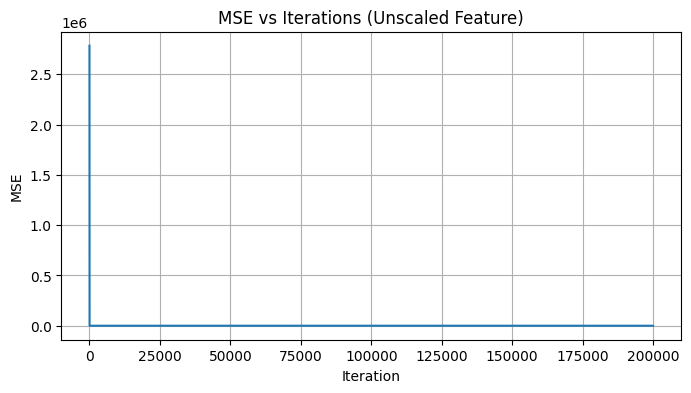

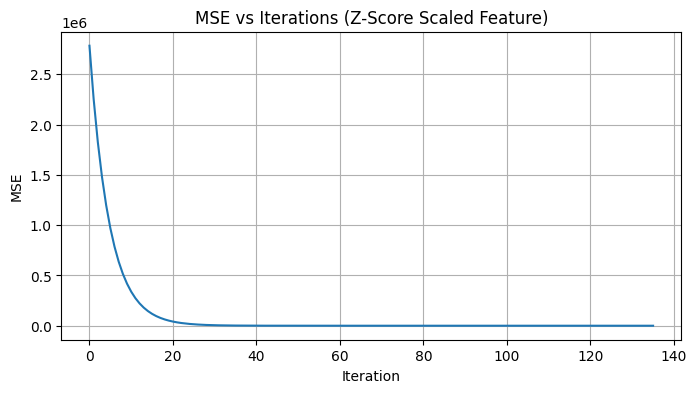

In [10]:

# Effect of Feature Scaling on Optimization (Linear Regression)

import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
np.random.seed(42)
num_samples = 100

x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

X_unscaled = np.column_stack((np.ones(num_samples), x))

# Analytical least-squares solution (Normal Equation)
theta_star_unscaled = np.linalg.pinv(X_unscaled.T @ X_unscaled) @ (X_unscaled.T @ y)

#Full-batch gradient descent function
def gradient_descent(X, y, theta_init, lr, epsilon=1e-3, max_iters=200000):
    n = X.shape[0]
    theta = theta_init.copy().astype(float)
    theta_star = np.linalg.pinv(X.T @ X) @ (X.T @ y)
    mse_history = []
    theta_diff_history = []

    for it in range(1, max_iters + 1):
        preds = X @ theta
        err = preds - y
        mse = np.mean(err ** 2)
        mse_history.append(mse)

        grad = (2.0 / n) * (X.T @ err)
        theta -= lr * grad

        theta_diff = np.linalg.norm(theta - theta_star)
        theta_diff_history.append(theta_diff)

        # Check convergence criterion
        if theta_diff < epsilon:
            return theta, it, mse_history, theta_diff_history, theta_star

    return theta, None, mse_history, theta_diff_history, theta_star

# GD on unscaled data
theta_init = np.zeros(2)
lr_unscaled = 1e-6  # small learning rate due to large feature scale
epsilon = 1e-3

theta_unscaled, it_unscaled, mse_hist_unscaled, theta_diff_hist_unscaled, theta_star_unscaled_calc = gradient_descent(
    X_unscaled, y, theta_init, lr_unscaled, epsilon=epsilon
)

# Apply z-score normalization and run GD
mu_x = np.mean(x)
sigma_x = np.std(x, ddof=0)
x_scaled = (x - mu_x) / sigma_x
X_scaled = np.column_stack((np.ones(num_samples), x_scaled))

theta_star_scaled = np.linalg.pinv(X_scaled.T @ X_scaled) @ (X_scaled.T @ y)

lr_scaled = 0.05  #using a much higher learning rate
theta_scaled, it_scaled, mse_hist_scaled, theta_diff_hist_scaled, theta_star_scaled_calc = gradient_descent(
    X_scaled, y, theta_init, lr_scaled, epsilon=epsilon
)

print(f"Unscaled θ* (analytical): {theta_star_unscaled}")
print(f"Unscaled GD final θ:      {theta_unscaled}")
print(f"Learning rate (unscaled): {lr_unscaled}")
print(f"Converged in: {it_unscaled if it_unscaled else 'NOT converged (200k iters limit)'} iterations")
print()
print(f"Scaled θ* (analytical):   {theta_star_scaled}")
print(f"Scaled GD final θ:        {theta_scaled}")
print(f"Learning rate (scaled):   {lr_scaled}")
print(f"Converged in: {it_scaled if it_scaled else 'NOT converged (200k iters limit)'} iterations")
print()
print(f"Feature mean (μx): {mu_x:.4f}, std (σx): {sigma_x:.4f}")

# 7. Plot MSE vs Iterations
plt.figure(figsize=(8, 4))
plt.plot(mse_hist_unscaled)
plt.title("MSE vs Iterations (Unscaled Feature)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(mse_hist_scaled)
plt.title("MSE vs Iterations (Z-Score Scaled Feature)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()



When gradient descent is applied without feature scaling, features with large magnitudes dominate the cost function, creating an elongated, poorly conditioned loss surface. This causes gradient updates to be uneven—small steps along shallow directions and zigzagging along steep ones—forcing the use of an extremely small learning rate and resulting in very slow or failed convergence. Applying z-score normalization rescales all features to a similar range, transforming the cost surface into a more symmetric, well-conditioned shape. This allows gradient descent to take balanced, stable steps in all directions, use a larger learning rate safely, and converge rapidly. In essence, feature scaling significantly improves both the speed and stability of gradient-based optimization by making the loss landscape more conducive to efficient learning.